<a href="https://colab.research.google.com/github/bldev2473/AudioProcessingWithPython/blob/main/AudioProcessingWithPython_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import wave
import numpy as np
import requests

r = requests.get('http://www.aoakley.com/articles/stereo-test.mp3')

with open('stereo-test.mp3', mode='bx') as f:
    f.write(r.content)

In [ ]:
print(r.content)

In [ ]:
pip install pydub

In [ ]:
from pydub import AudioSegment
sound = AudioSegment.from_mp3('stereo-test.mp3')
sound.export('stereo-test.wav', format="wav")

<_io.BufferedRandom name='stereo-test.wav'>

In [ ]:
file = wave.open('stereo-test.wav')

In [ ]:
fr = file.getframerate()
print(fr)

32000


In [ ]:
nframes = file.getnframes()
print(nframes)

535781


In [ ]:
nchannels = file.getnchannels()
print(nchannels)

2


In [ ]:
data = file.readframes(100000)
print(data)
nframes = 100000

In [ ]:
w_data = np.frombuffer(data, np.int16)
print(w_data)

[  47   -1  200 ... 1500    0 1926]


In [ ]:
w_data.shape = -1, 2
print(w_data)

[[  47   -1]
 [ 200    1]
 [ -82   -1]
 ...
 [   0  903]
 [   0 1500]
 [   0 1926]]


In [ ]:
w_data = w_data.T
print(w_data)

[[  47  200  -82 ...    0    0    0]
 [  -1    1   -1 ...  903 1500 1926]]


In [ ]:
print(len(w_data[0]), len(w_data[1]))

100000 100000


In [ ]:
print(nframes/fr)
duration = 1/fr
print(duration)

3.125
3.125e-05


In [ ]:
time_sequence = np.arange(0, nframes/fr, duration)
print(time_sequence)

[0.00000000e+00 3.12500000e-05 6.25000000e-05 ... 3.12490625e+00
 3.12493750e+00 3.12496875e+00]


In [ ]:
import matplotlib.pyplot as plt

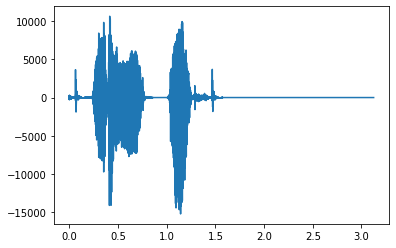

In [ ]:
plt.plot(time_sequence, w_data[0])
plt.show()

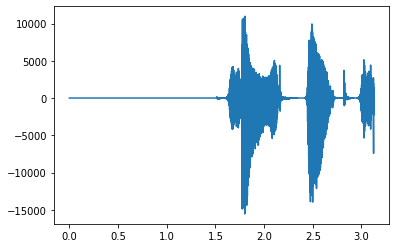

In [ ]:
plt.plot(time_sequence, w_data[1])
plt.show()